# Normal Distribution Fitting By Maximizing Likelihood

The underlying distribution is $\mathscr{N}(x|1,1)$. By sampling from such distribution, datasets can be created and the mean value; the variance can be esitmated by maximizing likelihood. 

As we know $\mathbb{E}(\boldsymbol{\mu}_{ML}) = \boldsymbol{\mu}$, but $\mathbb{E}(\boldsymbol{\Sigma}_{ML}) = \frac{N-1}{N}\boldsymbol{\Sigma}$. By doing some algebra, we could get such conclusion (see **algebra section**). By simulating such process we could also reach the same result (see **simulation section**.

The dataset size is change from 5 to 100 with 5 as a step (i.e. 5, 10, 15, 20 ..., 100). For a fixed dataset size, we generate 5000 independent datasets. 

The mean and the variance are fitted from the dataset

## Algebra
$$
\begin{align}
\mathbb{E}(\boldsymbol{\mu}_{ML}) &= 
\mathbb{E}(\frac{1}{N}\sum_{n=1}^N\boldsymbol{x}_n) \\
&=\frac{1}{N}\sum_{n=1}^N\mathbb{E}(\boldsymbol{x}_n) \\
&=\frac{1}{N}\sum_{n=1}^N\boldsymbol{\mu} \\
&=\boldsymbol{\mu}
\end{align} 
$$


$$
\begin{align}
\mathbb{E}(\Sigma_{ML}) &= 
\frac{1}{N}\mathbb{E}(\sum_{n=1}^{N}
 (\boldsymbol{x}_n-\boldsymbol{\mu}_{ML})(\boldsymbol{x}_n-\boldsymbol{\mu}_{ML})^T) \\
&=\frac{1}{N}\mathbb{E}
(\sum_{n=1}^{N}
 (\boldsymbol{x}_n\boldsymbol{x}_n^T
 -\boldsymbol{\mu}_{ML}\boldsymbol{x}_n^T
 -\boldsymbol{x}_n\boldsymbol{\mu}_{ML}^T
 +\boldsymbol{\mu}_{ML}\boldsymbol{\mu}_{ML}^T)) \\
&=\frac{1}{N}
[\mathbb{E}(\sum_{n=1}^{N}\boldsymbol{x}_n\boldsymbol{x}_n^T)
-\mathbb{E}(\frac{1}{N}\sum_{n=1}^{N}\sum_{m=1}^{N}\boldsymbol{x}_m\boldsymbol{x}_n^T)
-\mathbb{E}(\sum_{n=1}^{N}\boldsymbol{x}_n\frac{1}{N}\sum_{m=1}^{N}\boldsymbol{x}_m^T)
+\mathbb{E}(\sum_{n=1}^{N}\frac{1}{N}\sum_{k=1}^{N}\boldsymbol{x}_k\frac{1}{N}\sum_{m=1}^{N}\boldsymbol{x}_m^T)]\\
&=\frac{1}{N}\sum_{n=1}^{N}\mathbb{E}(\boldsymbol{x}_n\boldsymbol{x}_n^T)
-\frac{2}{N^2}(\sum_{n=1}^{N}\mathbb{E}(\boldsymbol{x}_n\boldsymbol{x}_n^T)
+\sum_{n=1,m=1,n\neq m}^{N}\mathbb{E}(\boldsymbol{x}_n)\mathbb{E}(\boldsymbol{x}_m^T)) \\
&\ \ \ +\frac{N}{N^3}(\sum_{n=1}^{N}\mathbb{E}(\boldsymbol{x}_n\boldsymbol{x}_n^T)
+\sum_{n=1,m=1,n\neq m}^{N}\mathbb{E}(\boldsymbol{x}_n)\mathbb{E}(\boldsymbol{x}_m^T)) \\
&=\frac{1}{N}\sum_{n=1}^{N}\mathbb{E}(\boldsymbol{x}_n\boldsymbol{x}_n^T)-\frac{1}{N^2}(\sum_{n=1}^{N}\mathbb{E}(\boldsymbol{x}_n\boldsymbol{x}_n^T)
+\sum_{n=1,m=1,n\neq m}^{N}\mathbb{E}(\boldsymbol{x}_n)\mathbb{E}(\boldsymbol{x}_m^T))  \\
&=\frac{N-1}{N^2}\sum_{n=1}^{N}\mathbb{E}(\boldsymbol{x}_n\boldsymbol{x}_n^T)
+\frac{1}{N^2}\sum_{n=1,m=1,n\neq m}^{N}\mathbb{E}(\boldsymbol{x}_n)\mathbb{E}(\boldsymbol{x}_m^T) \\
&=\frac{N-1}{N^2}N\mathbb{E}(\boldsymbol{x}\boldsymbol{x}^T)
+\frac{1}{N^2}N(N-1)\mathbb{E}(\boldsymbol{x})\mathbb{E}(\boldsymbol{x}^T) \\
&= \frac{N-1}{N}(\mathbb{E}(\boldsymbol{x}\boldsymbol{x}^T)-\mathbb{E}(\boldsymbol{x})\mathbb{E}(\boldsymbol{x}^T))  \\
&= \frac{N-1}{N}\Sigma
\end{align} 
$$

## Simulation

Fitting completed


Text(0.5,1,'ADJUSTED Variance value versus dataset size')

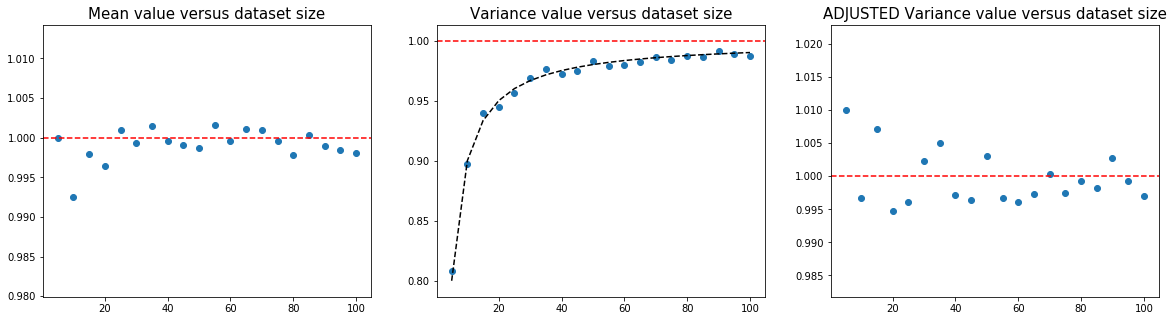

In [26]:
import numpy as np
import matplotlib.pyplot as plt

mean_dict, var_dict, var_adj_dict = {}, {}, {}  

for s in range(5, 105, 5):
    mean, var, var_adj = [], [], []
    for _ in range(5000):
        sample = np.random.normal(1,1, (s))
        mean.append(np.mean(sample))
        var.append(np.var(sample))
        var_adj.append(np.var(sample, ddof = 1))
    mean_dict[s] = np.mean(mean)
    var_dict[s] = np.mean(var)
    var_adj_dict[s] = np.mean(var_adj)
print("Fitting completed")    
fig, axes = plt.subplots(1, 3, figsize = (20,5))
axes[0].scatter(mean_dict.keys(), mean_dict.values())
axes[0].axhline(1, color= "red", linestyle = "dashed")
axes[0].set_title("Mean value versus dataset size", fontsize = 15)

axes[1].scatter(var_dict.keys(), var_dict.values())
axes[1].axhline(1, color= "red", linestyle = "dashed")
axes[1].plot(var_dict.keys(),[(each-1)/each for each in var_dict.keys()] , color= "black", linestyle = "dashed") 
## Black curve is (N-1)/N versus N, which scatters should follow
axes[1].set_title("Variance value versus dataset size", fontsize = 15)

axes[2].scatter(var_adj_dict.keys(), var_adj_dict.values())
axes[2].axhline(1, color= "red", linestyle = "dashed")
axes[2].set_title("ADJUSTED Variance value versus dataset size", fontsize = 15)